# CNN with TensorFlow

#### Introduction

Welcome to this comprehensive tutorial on Convolutional Neural Networks (CNNs) using TensorFlow! Whether you're new to deep learning or looking to enhance your understanding of CNNs, this workbook will guide you through each step of building a powerful image classification model.

In this tutorial, you'll learn how to implement a CNN from scratch using TensorFlow, one of the most popular deep learning frameworks. CNNs have revolutionized computer vision tasks by efficiently processing grid-like data such as images through specialized layers designed to detect spatial hierarchies of features.

#### What You'll Build

We'll be constructing a robust CNN architecture consisting of 9 strategically designed layers:
- 1 input layer to feed your data into the network
- 3 convolutional layers that will learn to extract important features from images
- 2 max pooling layers to reduce dimensionality while retaining critical information
- 1 flatten layer to transform our 3D feature maps into a 1D vector
- 2 densely connected layers to perform classification based on the extracted features

#### What You'll Learn

By the end of this tutorial, you'll understand:
- The fundamental concepts behind CNNs and why they excel at image processing
- How to prepare and preprocess image data for deep learning
- The purpose and function of each layer in our CNN architecture
- Techniques for training and optimizing your model
- Methods to evaluate your model's performance and prevent overfitting

Let's get started on this exciting journey into the world of convolutional neural networks! First, lets import all the libraries and utilities we will require.





In [2]:
# Imports
import numpy as np

# PyPlot is included so we can show how the CNN processes images at each layer.
import matplotlib.pyplot as plt

# This tutorial focuses on TensorFlow, we found it's API more illustrative of the CNN pipeline.
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import datasets, layers,Input
from tensorflow.keras.preprocessing import image

import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


import keras

## Loading and Preprocessing the CIFAR-10 Dataset

This code snippet handles two essential steps in preparing data for our CNN:

### 1. Loading the Dataset
```python
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
```
- This line downloads and loads the CIFAR-10 dataset from TensorFlow's built-in datasets
- CIFAR-10 contains 60,000 32x32 color images across 10 different classes
- The data is automatically split into training and testing sets:
  - `train_images`: 50,000 images for training the model
  - `train_labels`: corresponding class labels for training images
  - `test_images`: 10,000 images for evaluating the model
  - `test_labels`: corresponding class labels for test images

### 2. Normalizing the Data
```python
train_images, test_images = train_images / 255.0, test_images / 255.0
```
- This line normalizes the pixel values by dividing all values by 255
- Original pixel values range from 0-255 (8-bit color depth)
- After normalization, all values are between 0 and 1
- Normalization is crucial because:
  - It helps the model converge faster during training
  - It prevents numerical instability issues
  - It ensures all input features are on a similar scale, which improves model performance


In [3]:
# Load and Split Data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Data Overview
The visualization created by the next cell helps you understand what kind of images your CNN will be learning from and confirms that the data loading process worked correctly before you begin training.

Run the code block and take a look at the output.

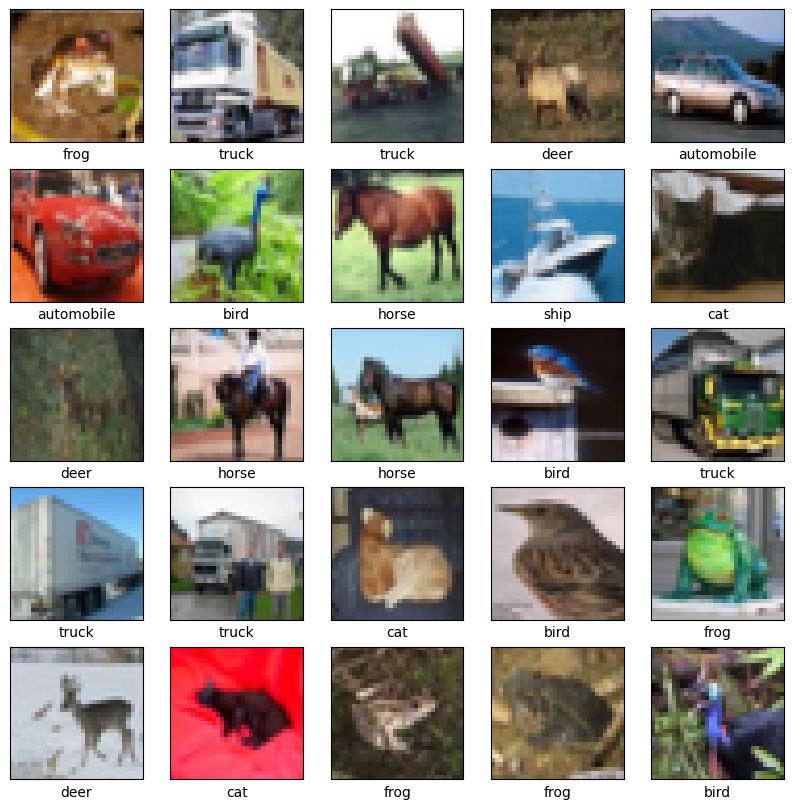

In [4]:
# Display Samples of data

# Note that the index of the class name is what our model ends up predicting. 
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


# Building Your CNN Model

Now it's time to create and define our CNN architecture using TensorFlow. Let's understand the key layers we'll use and how they work together.

## Understanding Layer Concepts and Chaining

In TensorFlow, neural networks are built by stacking layers sequentially. Each layer:
- Takes input from the previous layer
- Performs specific transformations
- Passes output to the next layer

Layers are chained together using the functional API syntax:
```python
output = layer_type(parameters)(input)
```

## Key Layers in Our CNN

### Input Layer
[Input Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Input)

Creates the entry point for our data into the model.

**Arguments:**
- `shape`: Tuple defining the dimensions of incoming data. For CIFAR-10, shape is `(32, 32, 3)` representing 32×32 pixel images with 3 color channels (RGB).
- `name`: Optional string to name the layer.

### Convolutional Layers
[Conv2D Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)

These layers apply filters to extract features from the input images.

**Arguments:**
- `filters`: Number of output filters (feature detectors).
- `kernel_size`: Size of the convolution window, specified as tuple `(height, width)` or as a single integer if both dimensions are the same.
- `activation`: Activation function, typically 'relu' for CNNs.
- `name`: Optional name for the layer.

**Example:**
```python
conv_layer = layers.Conv2D(32, (3, 3), activation='relu', name='conv1')(input_layer)
```

### MaxPooling Layers
[MaxPooling2D Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)

These layers reduce the spatial dimensions of the data, helping with computational efficiency and feature generalization.

**Arguments:**
- `pool_size`: Size of the pooling window, specified as tuple `(height, width)` or as a single integer.
- `name`: Optional name for the layer.

**Example:**
```python
pool_layer = layers.MaxPooling2D((2, 2), name='pool1')(conv_layer)
```

### Flatten Layer
[Flatten Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)

This layer transforms 2D feature maps into a 1D vector that can be processed by dense layers.

**Arguments:**
- `name`: Optional name for the layer.

**Example:**
```python
flatten_layer = layers.Flatten(name='flatten')(pool_layer)
```

### Dense Layers
[Dense Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)

Fully connected layers that perform classification based on the features extracted by convolutional layers.

**Arguments:**
- `units`: Number of neurons in the layer.
- `activation`: Activation function (e.g., 'relu' for hidden layers, 'softmax' for output layer in classification).
- `name`: Optional name for the layer.

**Example:**
```python
dense_layer = layers.Dense(128, activation='relu', name='dense1')(flatten_layer)
output_layer = layers.Dense(10, activation='softmax', name='output')(dense_layer)
```

## Building a Complete Model

By chaining these layers together, we'll create our complete CNN architecture to classify CIFAR-10 images. Each layer builds upon the previous one, gradually transforming raw image data into meaningful class predictions.


In [5]:
# initialize layers with appropriate arguments

inputs = Input(shape=(32, 32, 3), name='input')
'''
Add additional layers here to complete the match our planned architecture:
    - 3 Convolution Layers
        - set the output size to 64
        - Use a 3x3 convolution window
        - Specify ReLu as the Activation function
    - 2 MaxPool Layers
        - use a 2x2 pooling window.

Be sure to give each layer a relevant name.
'''

layer = layers.Flatten(name='flatten')(inputs)
'''
Add an additional Dense layer here with:
    - 64 units
    - `relu` activation function
'''
# 
outputs = layers.Dense(10, name='output')(layer)

model = Model(inputs, outputs)


# Visualizing Feature Maps in Your CNN

This code block demonstrates how to visualize the feature maps produced by each layer in your CNN. Feature maps (also called activation maps) show what features each layer is detecting in the input image, providing valuable insights into how your network "sees" and processes the data.

## Understanding Feature Maps

Feature maps are the outputs of convolutional layers after applying filters to the input. Early layers typically detect simple features like edges and textures, while deeper layers identify more complex patterns and object parts. Visualizing these maps helps you:

- Understand what your CNN is learning
- Diagnose problems in your network architecture
- Verify that your model is focusing on relevant features
- Explain how your model makes predictions

## Interpreting the Visualizations

When examining the feature maps:

- **First convolutional layer**: Look for basic feature detectors like edge and color detectors
- **Middle layers**: Expect to see more complex patterns forming
- **Deeper layers**: These should show higher-level features specific to your dataset's classes
- **Blank or noisy activations**: May indicate dead neurons or filters that haven't learned useful features

This visualization technique is invaluable for understanding how your CNN processes images and can help guide improvements to your model architecture.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


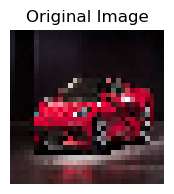


Layer 1: input
Shape: (1, 32, 32, 3)


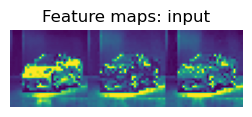


Layer 2: flatten
Shape: (1, 3072)


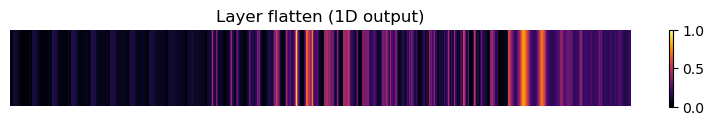


Layer 3: output
Shape: (1, 10)


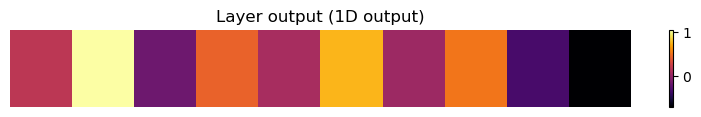

In [6]:
# Visualize Activations for sample image

# Model to fetch all layer outputs
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Load and preprocess image
def load_and_prepare_image(img_path, target_size=(32, 32)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize to [0,1]
    return img_array

# Visualize activations
def visualize_activations(img_array):
    activations = activation_model.predict(img_array)

    plt.figure(figsize=(2, 2))
    plt.imshow(img_array[0])
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    for i, (layer, activation) in enumerate(zip(model.layers, activations)):
        print(f"\nLayer {i+1}: {layer.name}")
        print("Shape:", activation.shape)

        if len(activation.shape) == 4:
            n_features = activation.shape[-1]
            size = activation.shape[1]
            n_cols = min(n_features, 6)
            display_grid = np.zeros((size, n_cols * size))
            for j in range(n_cols):
                feature_map = activation[0, :, :, j]
                feature_map -= feature_map.mean()
                feature_map /= (feature_map.std() + 1e-5)
                feature_map *= 64
                feature_map += 128
                feature_map = np.clip(feature_map, 0, 255).astype('uint8')
                display_grid[:, j * size : (j + 1) * size] = feature_map
            scale = 1. / size
            plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
            plt.title(f'Feature maps: {layer.name}')
            plt.imshow(display_grid, aspect='auto', cmap='viridis')
            plt.axis('off')
            plt.show()

        elif len(activation.shape) == 2:
            plt.figure(figsize=(10, 1))
            plt.title(f'Layer {layer.name} (1D output)')
            plt.imshow(activation, aspect='auto', cmap='inferno')
            plt.colorbar()
            plt.axis('off')
            plt.show()



image_path = "sample_data/sample.jpg"  # Replace this with your image path
if os.path.exists(image_path):
    img_array = load_and_prepare_image(image_path)
    visualize_activations(img_array)
else:
    print("Image not found. Please check the path.")

In [7]:
# Print a summary of the model and its parameters

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │        30,730 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,730 (120.04 KB)

 Trainable params: 30,730 (120.04 KB)

 Non-trainable params: 0 (0.00 B)

# Compiling and Training Your CNN Model

After building your CNN architecture, it's time to compile the model and prepare it for training. This crucial step configures how the model will learn from data.

## Model Compilation

The `model.compile()` method configures the learning process by specifying three essential components:

```python
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
```

### Optimizer: ADAM

We'll use the **ADAM (Adaptive Moment Estimation)** optimizer, which is highly effective for deep learning models. ADAM:

- Computes adaptive learning rates for each parameter
- Combines the advantages of two other optimization methods: AdaGrad and RMSProp
- Considers both first-order moments (mean) and second-order moments (variance) of the gradients
- Generally achieves good results with minimal tuning of hyperparameters

[Learn more about TensorFlow optimizers](https://www.geeksforgeeks.org/optimizers-in-tensorflow/)

### Loss Function: Sparse Categorical Cross Entropy

The loss function quantifies how well the model is performing by measuring the difference between predictions and actual values. For our multi-class image classification task, we'll use **Sparse Categorical Cross Entropy** because:

- It's designed for classification problems where labels are integers (0-9 for CIFAR-10)
- Unlike regular categorical cross-entropy, it doesn't require one-hot encoded labels
- It's computationally efficient for problems with many classes

[Learn more about TensorFlow loss functions](https://www.geeksforgeeks.org/loss-function-in-tensorflow/) or read this [comprehensive guide to loss functions](https://medium.com/@MrBam44/loss-functions-and-their-use-in-neural-networks-5ca908d0e8fc)

### Metrics

The `metrics` parameter defines what measurements to track during training and evaluation:

- We'll use `'accuracy'` as our primary metric to monitor classification performance
- TensorFlow allows tracking multiple metrics by providing them in a list: `metrics=['accuracy', 'precision', 'recall']`
- Additional metrics will be discussed in more detail in the model evaluation section

## Training the Model

After compilation, we'll train the model using the `model.fit()` method:

```python
history = model.fit(
    train_images, train_labels,
    epochs=10,
    validation_data=(test_images, test_labels)
)
```

This process:
1. Feeds batches of training data through the network
2. Computes the loss value
3. Updates model weights to minimize loss
4. Tracks specified metrics
5. Returns a `history` object containing training metrics for further analysis

The training phase is where your model learns to recognize patterns in the CIFAR-10 dataset and develops the ability to classify new, unseen images.


In [8]:
# Compile and Train model:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))



Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.2871 - loss: 2.0326 - val_accuracy: 0.3078 - val_loss: 1.9574
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 590us/step - accuracy: 0.3498 - loss: 1.8834 - val_accuracy: 0.3285 - val_loss: 2.0745
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step - accuracy: 0.3643 - loss: 1.8505 - val_accuracy: 0.3821 - val_loss: 1.7809
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 614us/step - accuracy: 0.3721 - loss: 1.8353 - val_accuracy: 0.3574 - val_loss: 1.8502
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step - accuracy: 0.3766 - loss: 1.8205 - val_accuracy: 0.3903 - val_loss: 1.7612
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step - accuracy: 0.3761 - loss: 1.8187 - val_accuracy: 0.3704 - val_loss: 1.8213
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step - accuracy: 0.3782 - loss: 1.8131 - val_accuracy: 0.3331 - val_loss: 1.9645
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step - accuracy: 0.3844 -

# Evaluating Your CNN's Performance

After training your CNN model, it's crucial to evaluate its performance thoroughly. This code block demonstrates how to assess your model's accuracy and visualize its confusion matrix, providing valuable insights into classification performance across different classes.

## Understanding Model Evaluation Metrics

### Accuracy
Accuracy measures the percentage of correctly classified images out of all test images. While useful as a general metric, accuracy alone doesn't tell the complete story, especially for imbalanced datasets.

### Confusion Matrix
A confusion matrix provides a detailed breakdown of your model's predictions by showing:
- Which classes are being confused with each other
- Where your model is making the most mistakes
- If your model has bias toward certain classes

## How to Interpret the Results

### Interpreting Accuracy
- **High accuracy** (>90%) suggests your model is performing well overall
- **Low accuracy** might indicate insufficient training, inappropriate architecture, or a challenging dataset

### Reading the Confusion Matrix
- **Diagonal elements** represent correct classifications
- **Off-diagonal elements** show misclassifications
- Look for patterns where certain classes are consistently misidentified

### Key Insights to Look For
1. **Class imbalance**: Are some classes predicted more often than others?
2. **Similar classes**: Which classes are most commonly confused with each other?
3. **Problematic classes**: Are there certain classes your model struggles to identify correctly?

## Using These Insights

These evaluation metrics help you:
- Identify which CIFAR-10 classes (like dogs, cats, airplanes) are most difficult for your model
- Diagnose if your model has biases toward certain classes
- Make targeted improvements to your model architecture or training approach
- Decide if more data augmentation or different preprocessing is needed for challenging classes

By analyzing both accuracy and the confusion matrix, you gain a comprehensive understanding of your CNN's strengths and weaknesses in classifying the CIFAR-10 dataset.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step
313/313 - 0s - 812us/step - accuracy: 0.3467 - loss: 1.9728


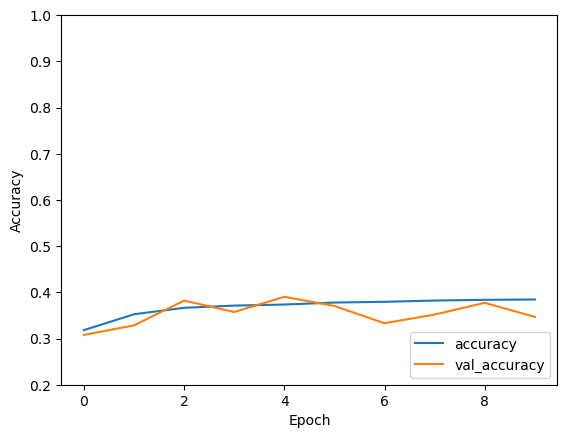

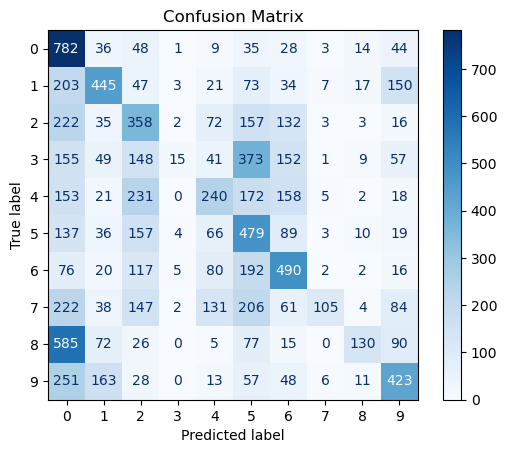

airplane 0


/var/folders/mq/kwq9hyvd6w3cxcg_djgcynpr0000gn/T/ipykernel_64448/3556977576.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
/var/folders/mq/kwq9hyvd6w3cxcg_djgcynpr0000gn/T/ipykernel_64448/3556977576.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


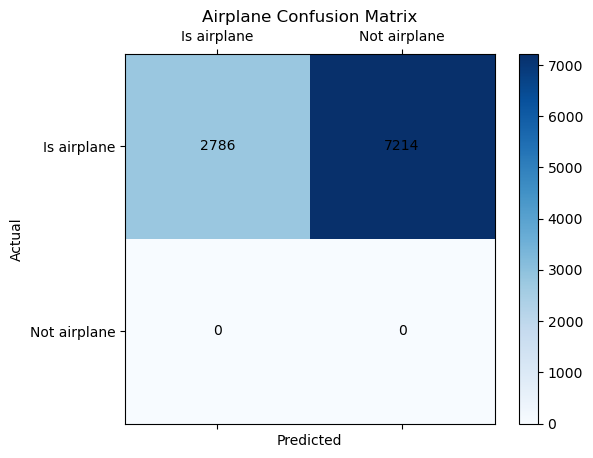

automobile 1


/var/folders/mq/kwq9hyvd6w3cxcg_djgcynpr0000gn/T/ipykernel_64448/3556977576.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
/var/folders/mq/kwq9hyvd6w3cxcg_djgcynpr0000gn/T/ipykernel_64448/3556977576.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


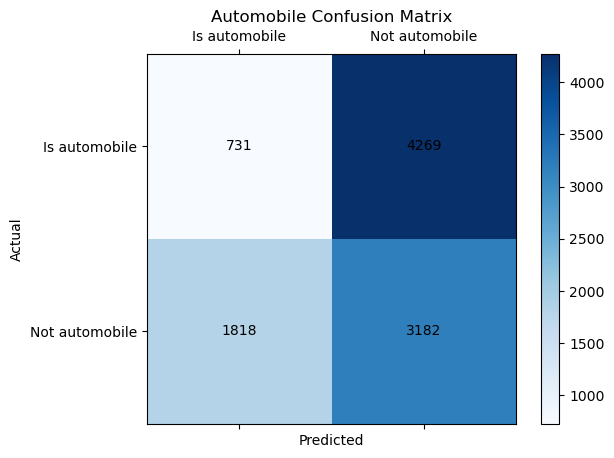

bird 2


/var/folders/mq/kwq9hyvd6w3cxcg_djgcynpr0000gn/T/ipykernel_64448/3556977576.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
/var/folders/mq/kwq9hyvd6w3cxcg_djgcynpr0000gn/T/ipykernel_64448/3556977576.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


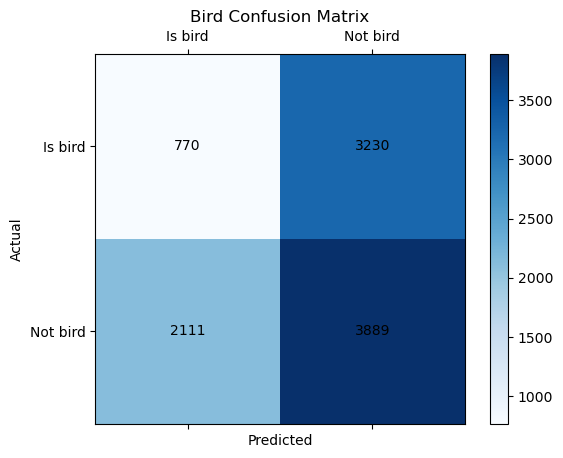

cat 3


/var/folders/mq/kwq9hyvd6w3cxcg_djgcynpr0000gn/T/ipykernel_64448/3556977576.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
/var/folders/mq/kwq9hyvd6w3cxcg_djgcynpr0000gn/T/ipykernel_64448/3556977576.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


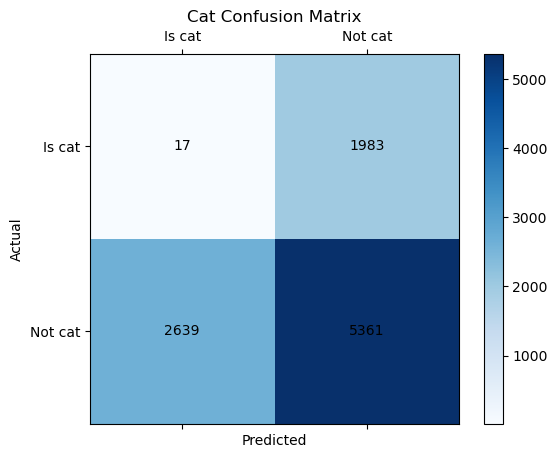

deer 4


/var/folders/mq/kwq9hyvd6w3cxcg_djgcynpr0000gn/T/ipykernel_64448/3556977576.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
/var/folders/mq/kwq9hyvd6w3cxcg_djgcynpr0000gn/T/ipykernel_64448/3556977576.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


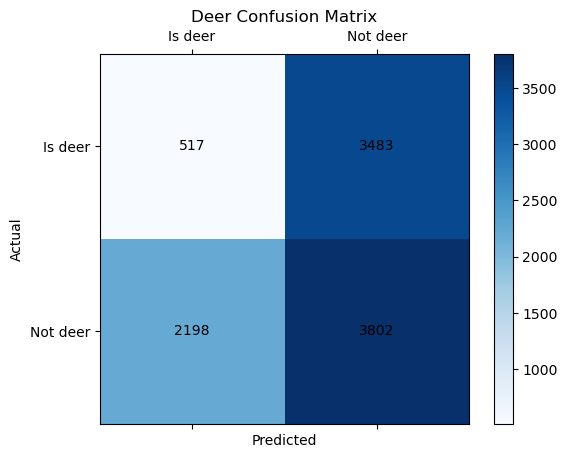

dog 5


/var/folders/mq/kwq9hyvd6w3cxcg_djgcynpr0000gn/T/ipykernel_64448/3556977576.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
/var/folders/mq/kwq9hyvd6w3cxcg_djgcynpr0000gn/T/ipykernel_64448/3556977576.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


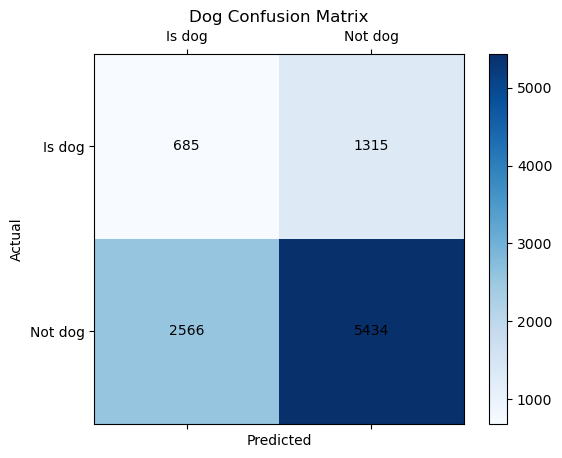

frog 6


/var/folders/mq/kwq9hyvd6w3cxcg_djgcynpr0000gn/T/ipykernel_64448/3556977576.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
/var/folders/mq/kwq9hyvd6w3cxcg_djgcynpr0000gn/T/ipykernel_64448/3556977576.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


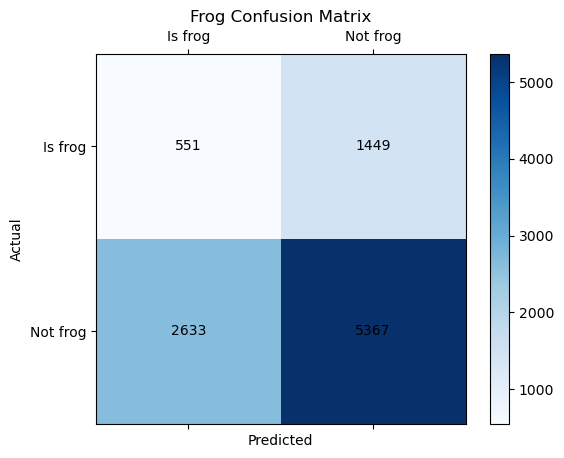

horse 7


/var/folders/mq/kwq9hyvd6w3cxcg_djgcynpr0000gn/T/ipykernel_64448/3556977576.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
/var/folders/mq/kwq9hyvd6w3cxcg_djgcynpr0000gn/T/ipykernel_64448/3556977576.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


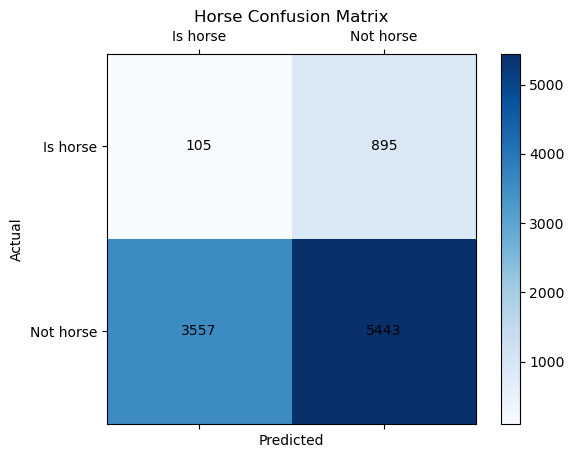

ship 8


/var/folders/mq/kwq9hyvd6w3cxcg_djgcynpr0000gn/T/ipykernel_64448/3556977576.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
/var/folders/mq/kwq9hyvd6w3cxcg_djgcynpr0000gn/T/ipykernel_64448/3556977576.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


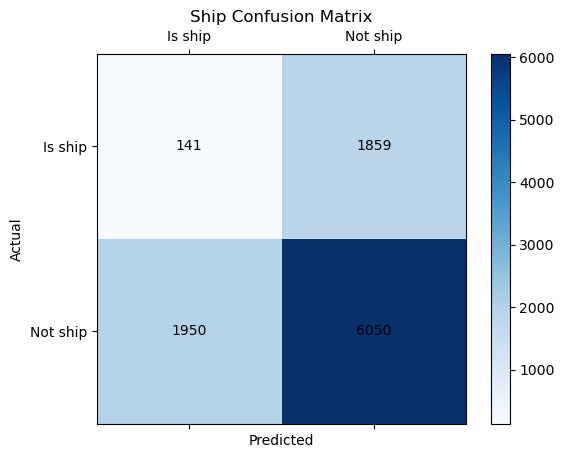

truck 9


/var/folders/mq/kwq9hyvd6w3cxcg_djgcynpr0000gn/T/ipykernel_64448/3556977576.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
/var/folders/mq/kwq9hyvd6w3cxcg_djgcynpr0000gn/T/ipykernel_64448/3556977576.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


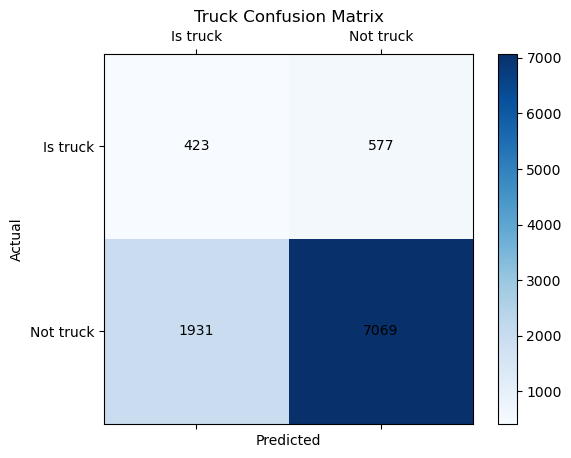

In [14]:
# Generate Predictions
logits = model.predict(test_images)
predicted_labels = np.argmax(logits, axis=1)

# Plot Prediction Accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)


# Plot Prediction Confusion Matrix
cm = confusion_matrix(test_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()



# Plot the binary confusion matrix for each class
for i, class_name in enumerate(class_names):
    print(class_name, i)
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for k in range(len(test_labels)):
        if predicted_labels[k] == i & test_labels[k] == i:
            tp += 1
        if predicted_labels[k] != i & test_labels[k] != i:
            tn += 1
        if predicted_labels[k] == i & test_labels[k] != i:
            fp += 1
        if predicted_labels[k] != i & test_labels[k] == i:
            fn += 1
    conf_matrix = np.array([[tp, fn],
                        [fp, tn]])
    labels = [f'Is {class_name}', f'Not {class_name}']
    fig, ax = plt.subplots()
    cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
    plt.title(f'{class_name.title()} Confusion Matrix')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    for (i, j), val in np.ndenumerate(conf_matrix):
        ax.text(j, i, f'{val}', va='center', ha='center')

    plt.show()




# Saving and Loading TensorFlow Models

Let's walk through the process of saving your trained CNN model and later loading it back into a new model instance. This is a crucial skill for any deep learning practitioner, as it allows you to:

- Save hours of training time by preserving trained models
- Share your models with others
- Deploy models in production environments
- Resume training from checkpoints

## Saving Your Model
To save the complete model use `model.save('./path/to/save')`. It saves the model architecture, weights, training configuration, and optimizer state in a single step.

## Loading Your Model
To load a complete model, use `tf.keras.models.load_model()`. It will load the complete configuration you saved using `model.save()`

In [10]:
# Save the trained model


# Load your saved model into a new model instance

# Further Learning

Now that you can define, instantiate and evaluate a CNN. Explore different model configurations to answer the following queries:
- How do fewer or more layers impact model performance? 
- Is there a difference in performance if you use Min or Mean pooling instead of Max pooling?
- How does using a different optimizer impact model performance? can you write a function that compares several optimizers?
- Try using the model on a different Data Set